In [11]:
from demo import *
import utils
from nltk.corpus import wordnet as wn
from pattern.en import conjugate, PAST, PRESENT, SINGULAR
import json
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

In [12]:
samples =  utils.read_json_file("./output/active_passive_captions.txt")

close file...


# Active Passive

In [15]:
def get_img_path(img_id):
    VG_100K_path = "./VG_100K/" + str(img_id) + ".jpg"
    VG_100K_2_path = "./VG_100K_2/" + str(img_id) + ".jpg"
    if os.path.exists(VG_100K_path):
        return VG_100K_path
    elif os.path.exists(VG_100K_2_path):
        return VG_100K_2_path
    else:
        return None
def show_image(img_path):
    if img_path == None:
        return
    image = Image.open(img_path).convert("RGB")
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return image

def show_samples(samples):
    start_index = np.random.randint(len(samples) - 10)
    for sample in samples[start_index:start_index+10]:
        img_id = sample['image_id']
        show_image(get_img_path(img_id))
        print(img_id)
        print("True1: ", sample['True1'])
        print("True2: ",sample['True2'])
        print("False1: ", sample['False1'])
        print("False2: ", sample['False2'])

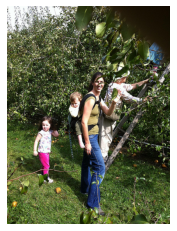

2339526
True1:  woman carries baby
True2:  baby is carried by woman
False1:  baby carries woman
False2:  woman is carried by baby


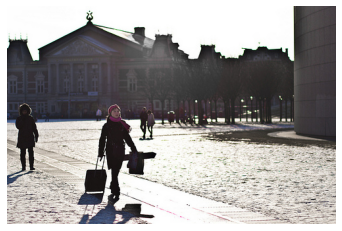

2339072
True1:  man follows woman
True2:  woman is followed by man
False1:  woman follows man
False2:  man is followed by woman


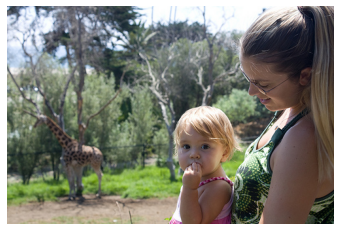

2338685
True1:  woman holds girl
True2:  girl is held by woman
False1:  girl holds woman
False2:  woman is held by girl


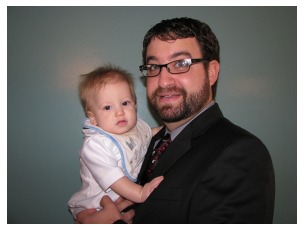

2338564
True1:  man holds baby
True2:  baby is held by man
False1:  baby holds man
False2:  man is held by baby


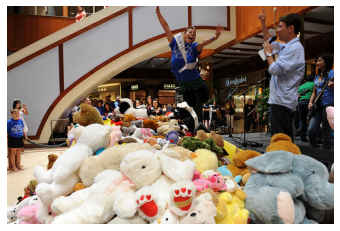

2338285
True1:  woman holds baby
True2:  baby is held by woman
False1:  baby holds woman
False2:  woman is held by baby


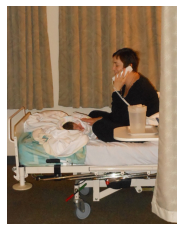

2337864
True1:  woman caresses baby
True2:  baby is caressed by woman
False1:  baby caresses woman
False2:  woman is caressed by baby


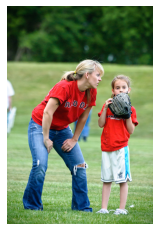

2337704
True1:  woman gives advice to girl
True2:  girl is gave advice to by woman
False1:  girl gives advice to woman
False2:  woman is gave advice to by girl


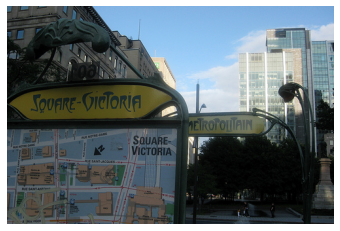

2337692
True1:  girl holds man
True2:  man is held by girl
False1:  man holds girl
False2:  girl is held by man


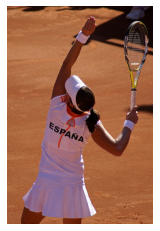

2337675
True1:  woman tenns player
True2:  player is tenned by woman
False1:  player tenns woman
False2:  woman is tenned by player


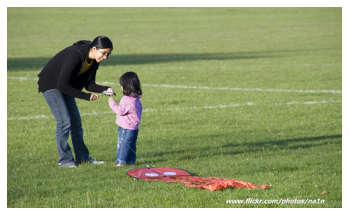

2337657
True1:  lady shows girl
True2:  girl is showed by lady
False1:  girl shows lady
False2:  lady is showed by girl


In [16]:

show_samples(samples)

# Coodination

In [17]:
images = utils.read_json_file('/Users/xinyichen/Desktop/Thesis/Dataset_Construction/output/co_image_captions.json')

close file...


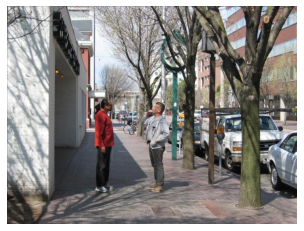

1
True1:  man wears sneakers and has shirt
True2:  man has shoes and jacket
False1:  man wears sneakers and has shoes
False2:  man has shirt and jacket


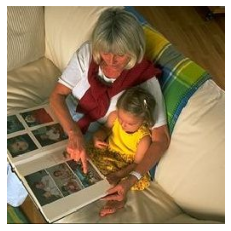

21
True1:  woman has hair and wearing watch
True2:  girl next to adult and wearing yellow
False1:  woman has hair and next to adult
False2:  girl wearing watch and yellow


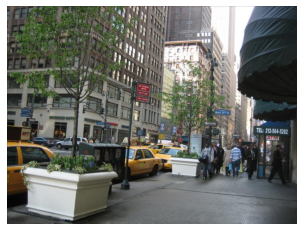

48
True1:  man wears sweatshirt and carries gym bag
True2:  man wears shirt and carries shopping bag
False1:  man wears sweatshirt and shirt
False2:  man carries gym bag and shopping bag


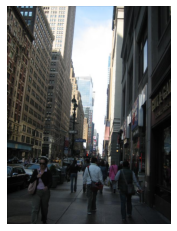

49
True1:  man wearing jacket and has bag
True2:  woman carrying bag and has a purse
False1:  man wearing jacket and carrying bag
False2:  woman has bag and has a purse


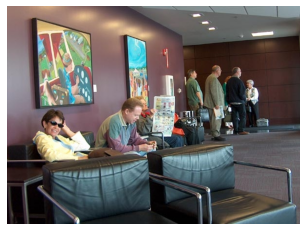

70
True1:  woman wearing shirt and sunglasses
True2:  man wearing jacket and standing behind man
False1:  woman wearing shirt and jacket
False2:  man wearing sunglasses and standing behind man


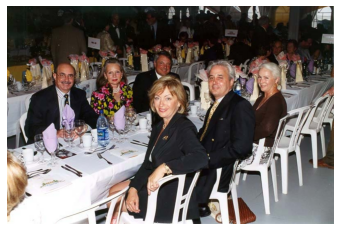

73
True1:  man wearing suit and glasses
True2:  woman sitting in chair and wearing necklace
False1:  man wearing suit and sitting in chair
False2:  woman wearing glasses and necklace


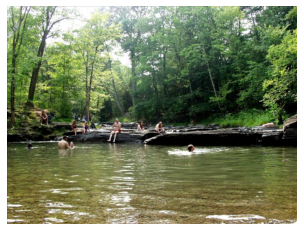

87
True1:  man wears shorts and wearing shorts
True2:  woman sits on rock and wearing swimsuit
False1:  man wears shorts and sits on rock
False2:  woman wearing shorts and swimsuit


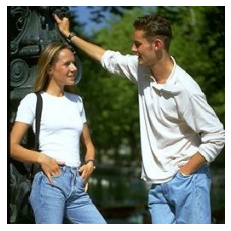

114
True1:  woman has nose and wearing jeans
True2:  man wearing jeans and talking to woman
False1:  woman has nose and wearing jeans
False2:  man wearing jeans and talking to woman


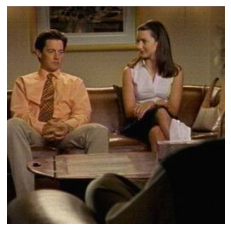

115
True1:  man has a neck tie and has right eye
True2:  woman wearing a blouse and has left hand
False1:  man has a neck tie and wearing a blouse
False2:  woman has right eye and left hand


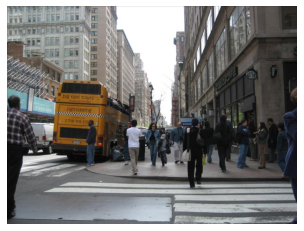

126
True1:  man wearing shirt and walking on street
True2:  man wearing t-shirt and pants
False1:  man wearing shirt and t-shirt
False2:  man walking on street and wearing pants


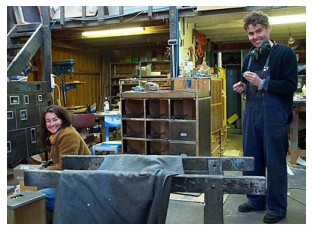

167
True1:  man wearing overalls and headphones
True2:  woman has hair and wearing coat
False1:  man wearing overalls and has hair
False2:  woman wearing headphones and coat


In [18]:
i = 0
for img_id, sample in images.items():
    if i > 10:
        break
    i += 1
    show_image(get_img_path(img_id))
    print(img_id)
    print("True1: ", sample['True1'])
    print("True2: ",sample['True2'])
    print("False1: ", sample['False1'])
    print("False2: ", sample['False2'])